# Analyse exploratoire 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from myfile import correl_pvalue, create_régression_linéaire,percentage_error,display_circles, \
                   display_scree_plot,scatter_plot_nutriscore,separete_liquid_solid,\
                   histograme_plot,boxplot_plot                   
from scipy import stats
#from scipy.stats import ttest_ind, ttest_ind_from_stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

import warnings
warnings.simplefilter(action='ignore', category=Warning)

regr = linear_model.LinearRegression()    # Create linear regression object
sns.set()

In [2]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

dir_data = Path('../../DATA/P3/') 
dir_fig  = Path('../../FIGURES/P3/')

marche_FR =0
file1 = Path(str(dir_data) + "/Projet_NScore.openfoodfacts.org.products.csv")

df_in =pd.read_csv(str(file1),  sep='\t', encoding='utf-8', low_memory=False)


In [3]:
df=pd.melt(frame=df_in, 
id_vars   =["nutriscore_grade",'product_name','categories','countries_en','ecoscore_grade_fr'] ,
value_vars=["sugars_100g","saturated-fat_100g",'energy_100g','sodium_100g','carbohydrates_100g','proteins_100g',
            'fiber_100g','additives_n','fat_100g','ecoscore_score_fr','nova_group'],
var_name  ="Food_composition", 
value_name="Quantities") 

In [4]:
if marche_FR == 1:
    region = 'FR_'
    df1=df[df['countries_en'].str.contains('France', na=True)]  
else:
    region = 'GLOBAL_'
    df1=df

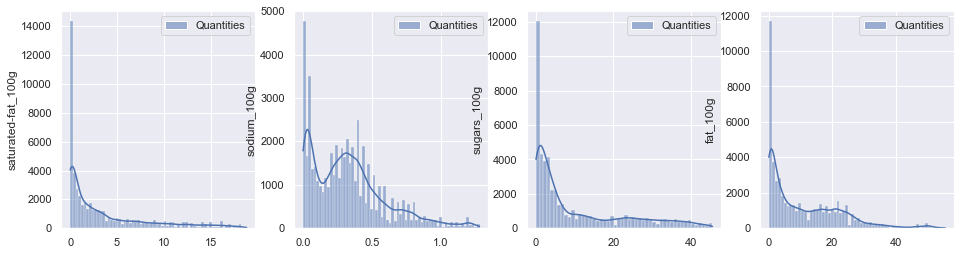

<Figure size 432x288 with 0 Axes>

In [5]:
varname='Food_composition'
tcolors="teal"

figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_1.jpeg'))
#
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
histograme_plot(df1, varname,'saturated-fat_100g',axs[0],tcolors)
histograme_plot(df1, varname,'sodium_100g',axs[1],tcolors)
histograme_plot(df1, varname,'sugars_100g',axs[2],tcolors)
histograme_plot(df1, varname,'fat_100g',axs[3],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

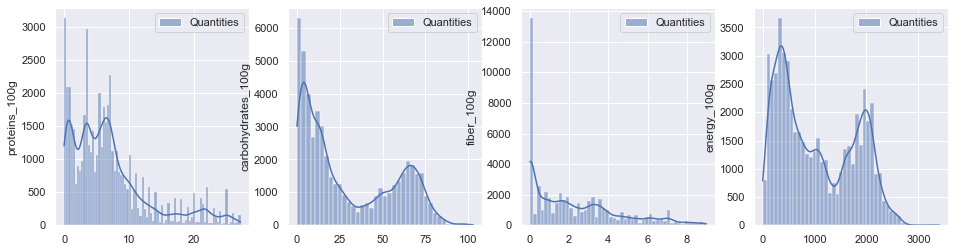

<Figure size 432x288 with 0 Axes>

In [6]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_2.jpeg'))
#
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
histograme_plot(df1, varname,'proteins_100g',axs[0],tcolors)
histograme_plot(df1, varname,'carbohydrates_100g',axs[1],tcolors)
histograme_plot(df1, varname,'fiber_100g',axs[2],tcolors)
histograme_plot(df1, varname,'energy_100g',axs[3],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

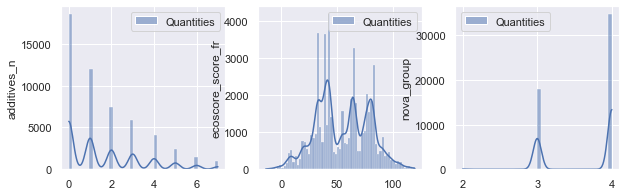

<Figure size 432x288 with 0 Axes>

In [7]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_3.jpeg'))
#
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
histograme_plot(df1, varname,'additives_n',axs[0],tcolors)
histograme_plot(df1, varname,'ecoscore_score_fr',axs[1],tcolors)
histograme_plot(df1, varname,'nova_group',axs[2],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')


In [8]:
# varname='Food_composition'
# linewidthy=1
# figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_1.jpeg'))
# #
# fig, axs = plt.subplots(1, 4, figsize=(16, 4))
# #boxplot_plot(df1, varname,'nutriscore_grade','Quantities','fat_100g',axs[0,0],linewidthy,"Nutriscore")
# xx='nutriscore_grade'
# yy='Quantities'
# valuevar='fat_100g'
# data=df[df[varname]==valuevar]
# gfg = sns.boxplot(x=xx, y=yy, data=df[df[varname]==valuevar],ax=axs[0,0],linewidth=linewidthy)

# gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='fat_100g'], ax=axs[0,0],linewidth=1)
# gfg.set(xlabel = "Nutriscore", ylabel = "fat_100g")


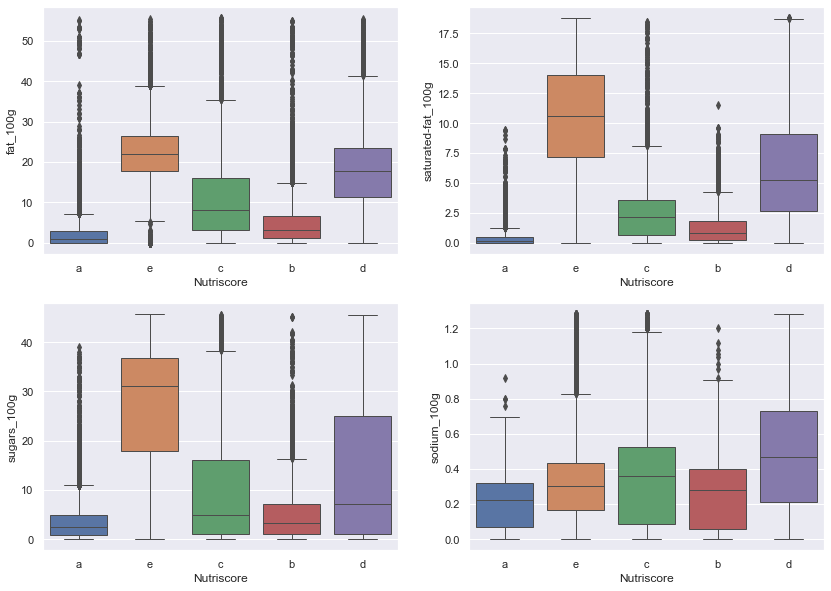

In [9]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_3.jpeg'))

fig, axs = plt.subplots (2, 2, figsize=(14, 10))
# plot boxplot
gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='fat_100g'], ax=axs[0,0],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "fat_100g")

gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='saturated-fat_100g'], ax=axs[0,1],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "saturated-fat_100g")

gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='sugars_100g'], ax=axs[1,0],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "sugars_100g")

gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='sodium_100g'], ax=axs[1,1],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "sodium_100g")

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')


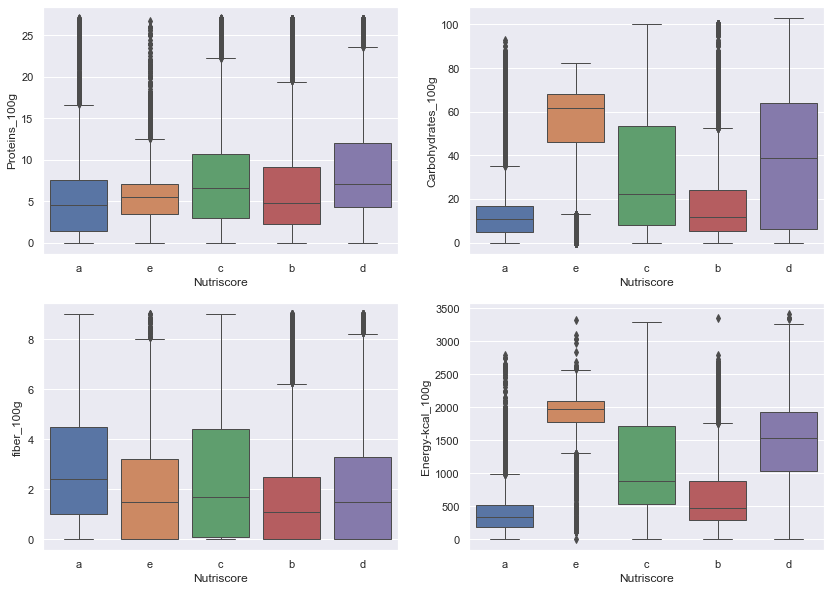

In [10]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_4.jpeg'))
fig, axs = plt.subplots (2, 2, figsize=(14,10))
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='proteins_100g'], ax=axs[0,0],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Proteins_100g")
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='carbohydrates_100g'], ax=axs[0,1],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Carbohydrates_100g")
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='fiber_100g'], ax=axs[1,0],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "fiber_100g")
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='energy_100g'], ax=axs[1,1],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Energy-kcal_100g")
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


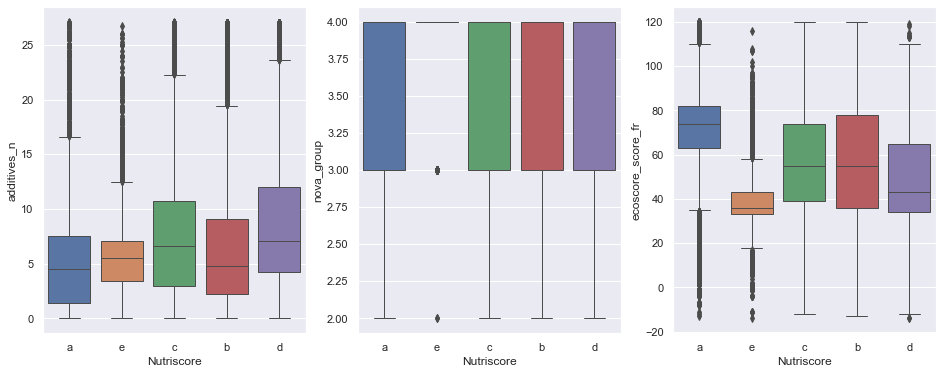

In [11]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_5.jpeg'))
fig, axs = plt.subplots (1,3, figsize=(16,6))
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='proteins_100g'], ax=axs[0],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = 'additives_n')
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='nova_group'], ax=axs[1],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = 'nova_group')
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='ecoscore_score_fr'], ax=axs[2],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "ecoscore_score_fr")
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')


### Quel est l'origine de ces carbohydrates dans des produits avec nutriscore D  et E? simple or complex carbohydrates?

#---simple carbohydrates ----- > monosaccharides (fructose (found in fruits) and galactose (found in milk products)), disaccharides (sucrose (table sugar), lactose (from dairy) and maltose (found in beer and some vegetables))
#---"empty calories" and can lead to weight gain
#---Complex carbohydrates (polysaccharides) include beans, peas, lentils, peanuts, potatoes, corn, parsnips, whole-grain breads and cereals.

### D et E sont tres energetiques. à cause de processed and refined sugars (empty calories")?  C'est à eviter


In [12]:
var_2_drop=["Unnamed: 0",'countries_en','ingredients_text']

df_projet = df_in.drop(var_2_drop, axis=1)        
data_corr = df_projet.drop(["nutriscore_grade",'ecoscore_grade_fr','categories','product_name'], axis=1)

[coef_correl,pvalue] = correl_pvalue(data_corr)

In [50]:
pvalue.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
# if pvalue > 0.05:
#     print('Probably independent')
# else:
#     print('Probably dependent')

,nutriscore_score,nova_group,ecoscore_score_fr,fat_100g,saturated-fat_100g,energy-kcal_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,additives_n
nutriscore_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8e-149,0.0,5.5e-107,0.0
nova_group,0.0,0.0,0.0,3.4e-12,4.3e-112,4.3e-128,7.4e-129,0.0,0.0,1.8e-125,0.04,2.4e-120,0.0
ecoscore_score_fr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5e-18,0.0,0.0,1.6e-139,2.1e-302,0.0
fat_100g,0.0,3.4e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7e-126
saturated-fat_100g,0.0,4.3e-112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8e-118,0.077,2.9e-314
energy-kcal_100g,0.0,4.3e-128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5e-286
energy_100g,0.0,7.4e-129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3e-284
carbohydrates_100g,0.0,0.0,2.5e-18,0.0,0.0,0.0,0.0,0.0,0.0,1e-78,0.091,0.0,0.0
sugars_100g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9e-138,0.0
proteins_100g,3.8e-149,1.8e-125,0.0,0.0,0.0,0.0,0.0,1e-78,0.0,0.0,0.0,1.1e-50,8.7e-107


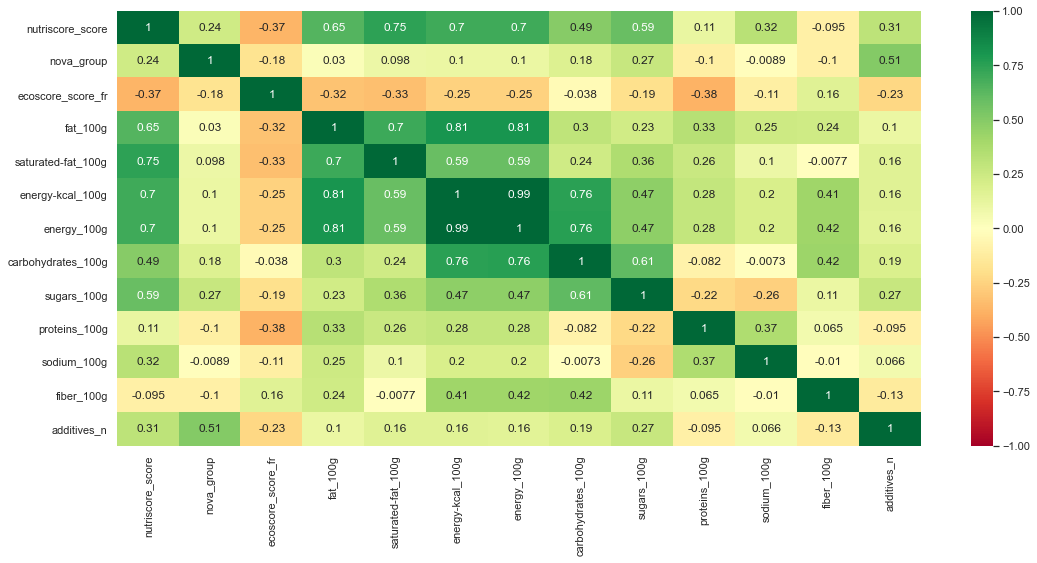

In [51]:
plt.figure(figsize=(18,8))
sns.heatmap(coef_correl, vmin=-1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()


## Predict nutriscore using  Linear regression 

In [52]:
y=df_projet['nutriscore_score']
X=pd.DataFrame(np.c_[df_projet['fat_100g'],df_projet['saturated-fat_100g'],df_projet['carbohydrates_100g'],
                     df_projet['sugars_100g'],df_projet['proteins_100g'],df_projet['sodium_100g'], 
                     df_projet['nova_group'],df_projet['ecoscore_score_fr'],df_projet['energy_100g'],
                     df_projet['additives_n'],df_projet['fiber_100g'],   
                     df_projet['product_name'],df_projet['nutriscore_grade'],df_projet['categories']])
tsize=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize)

y_teste=X_test.values[:,-3]
y_testc=X_test.values[:,-2]
y_testd=X_test.values[:,-1]
X_train=X_train.values[:,:-3]
X_test =X_test.values[:,:-3]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [53]:
y_pred = regr.predict(X_test)
 
df_score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Nutriscore_grade': y_testc,'categories': y_testd,
                         'product_name':y_teste,'Actual-Predicted':y_test-y_pred})

In [55]:
print('Coefficients: \n', regr.coef_)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) # Note that for rmse, the lower that value is, the better the fit
test_set_r2 = r2_score(y_test, y_pred)                        # The closer towards 1, the better the fit
print('root-mean-square error ',test_set_rmse)
print('Coefficient of determination:', test_set_r2)


Coefficients: 
 [ 3.46692147e-02  7.11608411e-01  1.53904620e-02  2.37730451e-01
 -1.80528231e-01  1.09735307e+01  3.13139268e-01 -1.70856713e-02
  3.54784872e-03  3.35909438e-02 -1.00400833e+00]
root-mean-square error  2.8742862867826977
Coefficient of determination: 0.8907214689924521


##### Equation 

In [56]:
y_predit = regr.intercept_ + [np.sum(regr.coef_*X_test[i,:]) for i in range(len(X_test))]
error    = y_predit-y_pred

##### Predicted vs Normal data

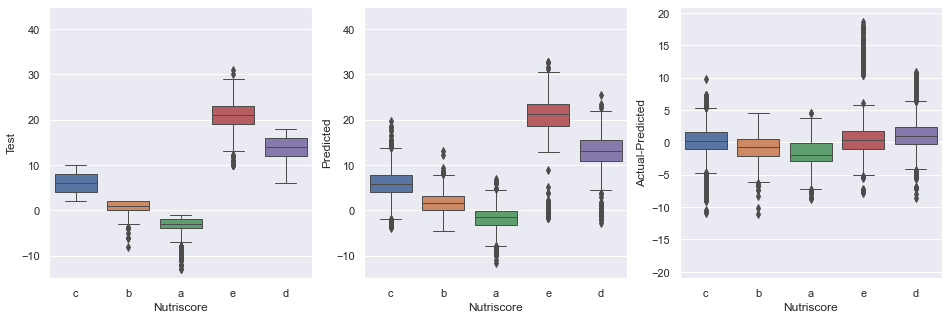

In [59]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Linear_regression.jpeg'))

miny=-15
maxy=45
ds=21
fig, axs = plt.subplots (1, 3, figsize=(16,5))
# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Actual', data=df_score, ax=axs[0],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "Test")
gfg.set(ylim=(miny, maxy))

# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Predicted', data=df_score, ax=axs[1],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = 'Predicted')
gfg.set(ylim=(miny, maxy))

# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Actual-Predicted', data=df_score, ax=axs[2],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = 'Actual-Predicted')
gfg.set(ylim=(-ds, ds))

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [20]:
listS    =[-15,0,3,11,19]  # pour solid food
listS_max=[-1,2,10,18,40]
listL    =[-1,1, 2,6,40]   # pour liquid food
listL_max=[-1,1,5,9,40]

[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted", listS_max[2],str("a,b,c"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      6453         7198               6374         1.2              10586


In [21]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted", listS_max[3],str("d,e"))

For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1235         1240               1065         13.8              10586


## PCA

In [22]:
from sklearn import decomposition
from sklearn import preprocessing 
n_comp=4
feat_cols = 'fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','sodium_100g','nova_group',\
           'ecoscore_score_fr','energy_100g','additives_n','fiber_100g'
x = df_projet.loc[:, feat_cols].values
y = df_projet['nutriscore_score']

names = df_projet.index
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
pca = decomposition.PCA(n_components=n_comp)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

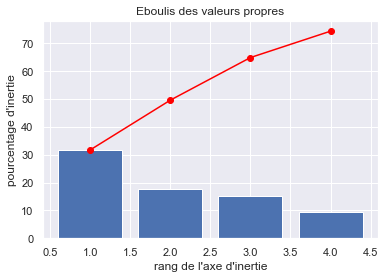

<Figure size 432x288 with 0 Axes>

In [60]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('percentagen_explique.jpeg'))

display_scree_plot(pca)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

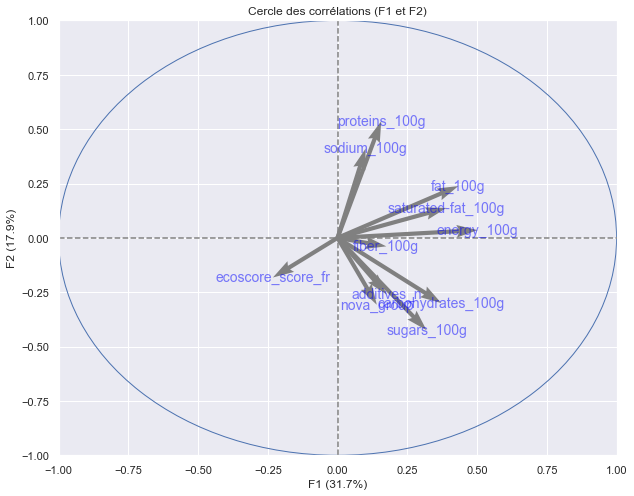

<Figure size 432x288 with 0 Axes>

In [61]:
# Cercle des corrélations
pcs = pca.components_
figure_name =Path(str(dir_fig) +'/' + str(region) + str('cicle_correle.jpeg'))

display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(feat_cols))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

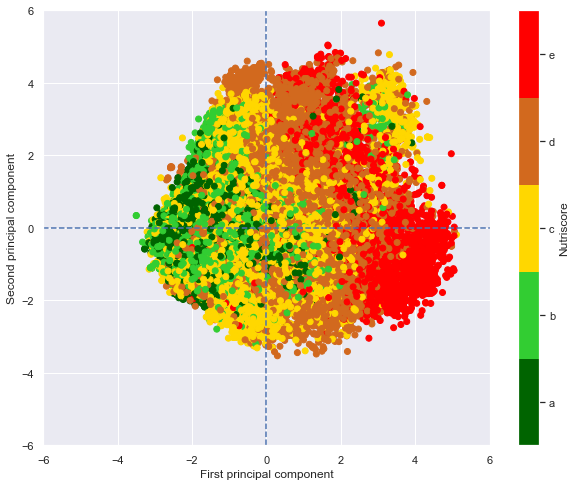

In [62]:
from matplotlib.colors import ListedColormap
xlim1=[-6,6]
ylim1=[-6,6]
nutriscore=["a","b","c","d","e"]
cmapy = ListedColormap(['darkgreen','limegreen','gold','chocolate','red'])
bounds = [-15,-1,2,10,18,40]
normy = BoundaryNorm(bounds, cmapy.N)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('scatter_individue.jpeg'))

scatter_plot_nutriscore(x_pca[:,0],x_pca[:,1],y,cmapy,normy,xlim1,ylim1,'First principal component',
                        'Second principal component','Nutriscore',bounds,nutriscore)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

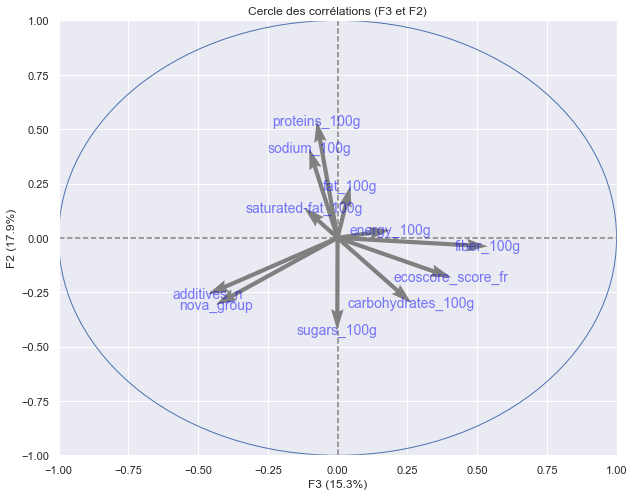

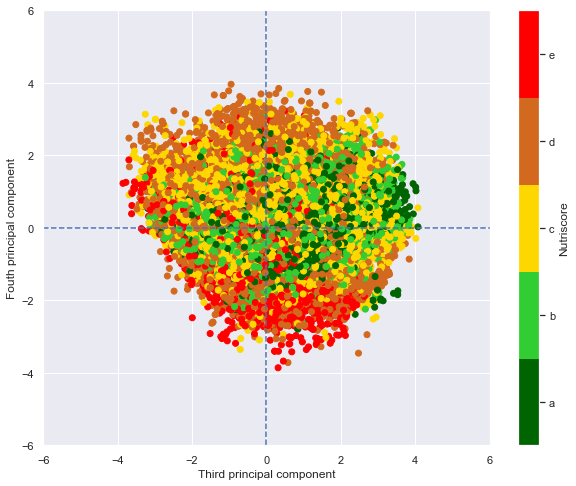

In [26]:
display_circles(pcs, n_comp, pca, [(2,1)], labels = np.array(feat_cols))


scatter_plot_nutriscore(x_pca[:,2],x_pca[:,3],y,cmapy,normy,xlim1,ylim1,'Third principal component',
                        'Fouth principal component','Nutriscore',bounds,nutriscore)


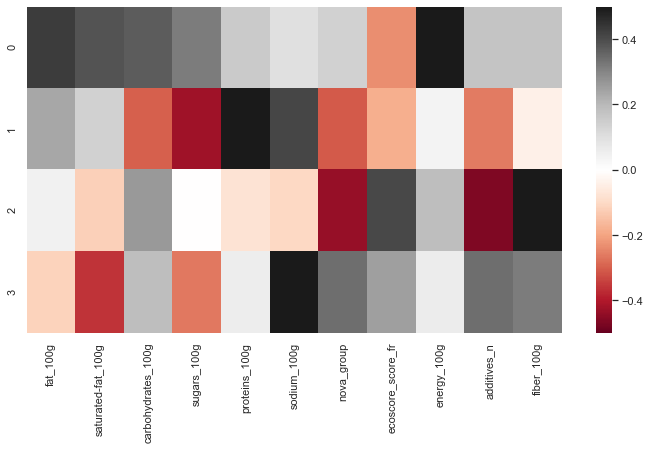

In [27]:
map= pd.DataFrame(pca.components_,columns=feat_cols)
plt.figure(figsize=(12,6))
ds=2
gfg=sns.heatmap(map,cmap='RdGy', vmin=-1/ds, vmax=1/ds)

In [28]:
pca.explained_variance_ratio_

array([0.3172618 , 0.17859429, 0.15288764, 0.09473371])

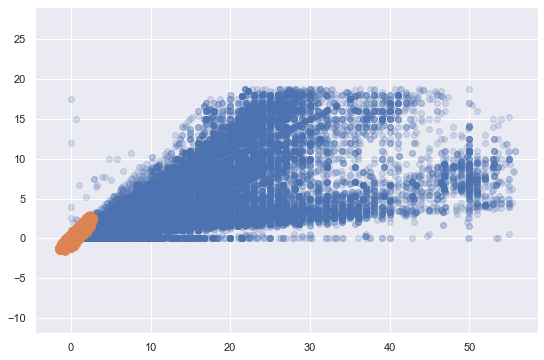

In [29]:
x_new = pca.inverse_transform(x_pca)

fig, axs = plt.subplots (1, 1, figsize=(9,6))
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal');

In [30]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_new, y, test_size=tsize)

regr_pca = linear_model.LinearRegression()
regr_pca.fit(X_pca_train, y_pca_train)
y_pca_pred = regr_pca.predict(X_pca_test)
 
df_pca_score = pd.DataFrame({'Actual': y_pca_test, 'Predicted': y_pca_pred,'Nutriscore_grade': y_testc,'categories': y_testd,
                         'product_name':y_teste,'Actual-Predicted':y_pca_test-y_pca_pred})

In [65]:
print('Coefficients: \n', regr_pca.coef_)

test_set_rmse_pca = (np.sqrt(mean_squared_error(y_pca_test, y_pca_pred))) # Note that for rmse, the lower that value is, the better the fit
test_set_r2_pca = r2_score(y_pca_test, y_pca_pred)                        # The closer towards 1, the better the fit
print('root-mean-square error ',test_set_rmse_pca)
print('Coefficient of determination:', test_set_r2_pca)


Coefficients: 
 [ 4.77231464e+13  3.81027231e+13  1.08540102e+13 -3.55427812e+13
 -7.58535083e+13  3.13511722e+13  5.38346784e+13 -5.45831158e+12
 -3.48220523e+13 -6.24176939e+13  4.17604169e+11]
root-mean-square error  4.702325166403827
Coefficient of determination: 0.7003011669931047


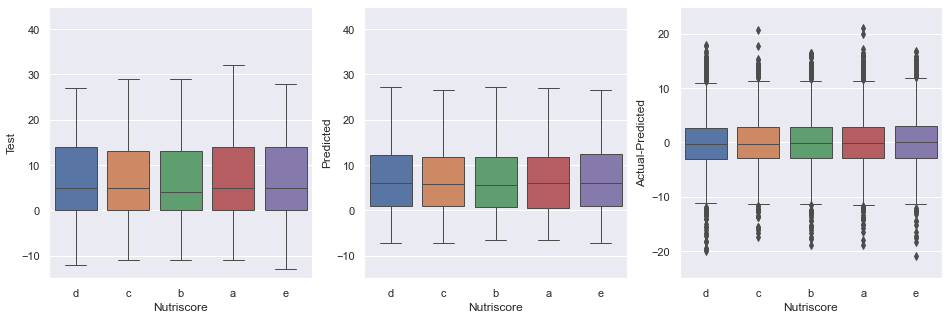

In [63]:
miny=-15
maxy=45
ds=25
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Linear_regression_PCA.jpeg'))
fig, axs = plt.subplots (1, 3, figsize=(16,5))
# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Actual', data=df_pca_score, ax=axs[0],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "Test")
gfg.set(ylim=(miny, maxy))

# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Predicted', data=df_pca_score, ax=axs[1],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = 'Predicted')
gfg.set(ylim=(miny, maxy))

# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Actual-Predicted', data=df_pca_score, ax=axs[2],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = 'Actual-Predicted')
gfg.set(ylim=(-ds, ds))

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [32]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_pca_score,"Actual","Predicted", listS_max[2],str("a,b,c"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      6497         7175               6070         6.6              10586


In [33]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_pca_score,"Actual","Predicted", listS_max[3],str("d,e"))

For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1263         899               730         42.2              10586


Equation

In [34]:
y_pca_predit = regr_pca.intercept_ + [np.sum(regr_pca.coef_*X_pca_test[i,:]) for i in range(len(X_pca_test))]
error    = y_pca_predit-y_pca_pred

En utilisant regression seule or avec pca, le percentage d'erreur est le meme. Je pense que le probleme vient des liquid vs solid food 

possible source de erreur: la division de nutriscore des liquid et solid food ne sont pas identique. 
penser à separer les produits en 2 categories?

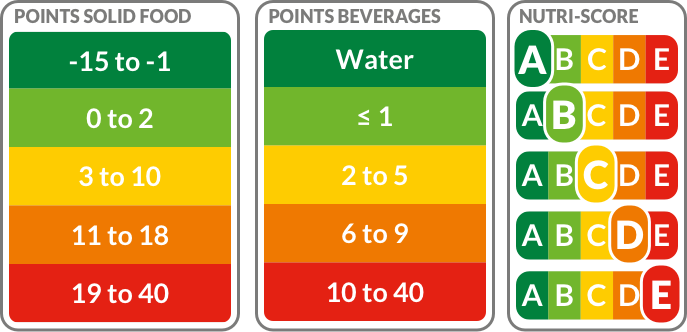

In [35]:
Image(filename = str(dir_fig) + "/"+ str("nutriscore-table-en@1_5x.png"), width=500, height=500)


In [36]:
da=1
dss=0
[liquid, solid] = separete_liquid_solid(df_score,da,dss)
[L_Vmask_actual,L_Vmask_Predict,L_commun_products,L_difference,L_mask_len]=percentage_error(liquid,"Actual","Predicted", 
                                                                                                listL_max[3],str("a,b,c"))
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(liquid,"Actual","Predicted", 
                                                                                      listL_max[3],str("d,e"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      813         926               812         0.1              1223
For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      382         297               291         23.8              1223


In [37]:

[L_Vmask_actual,L_Vmask_Predict,L_commun_products,L_difference,L_mask_len]=percentage_error(solid,"Actual","Predicted", 
                                                                                                listS_max[3],str("a,b,c"))
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(solid,"Actual","Predicted", 
                                                                                      listS_max[3],str("d,e"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      7927         8140               7846         1.0              9325
For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1190         1185               1030         13.4              9325


Le percentage ne s'ameliere pas meme apres la separation des solid et liquid dans les produits francais

## KMeans
### KMeans with all data

In [68]:

sum_of_squared_distances = []
si_coef = []
#ca_score =[]
K = range(1,11)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(x)
    sum_of_squared_distances.append(k_means.inertia_)
    #y_hat_k = k_means.predict(x)
    labels_k = k_means.labels_
    if k>1:
        si_coef.append(metrics.silhouette_score(x, labels_k, metric = 'euclidean'))
   #     ca_score.append(metrics.calinski_harabasz_score(x, labels_k))

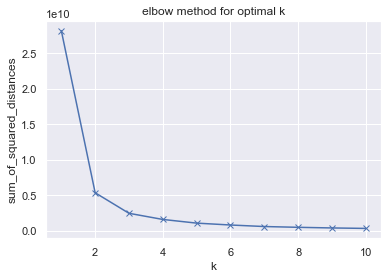

<Figure size 432x288 with 0 Axes>

In [73]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_distance_all.jpeg'))

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [74]:
coef_variation = ([ si_coef[t]- si_coef[t-1] for t in range(1,len(si_coef)) ]) 
# We can verify this by calculating the silhouette coefficient and CH score for k=5.
print(coef_variation)


[-0.06291709101963994, -0.056215682080077545, -0.04612297055303993, -0.007092302494430602, -0.005152164825006356, -0.005967735816565289, -0.014171857266445431, -0.004489066966176292]


Here we can see the drop in the sum of squared distance starts to slow down after k=2. Hence 3 is the optimal number of clusters for our analysis.

In [80]:
k=3
k_means = KMeans(n_clusters=k).fit(x)
labels  =k_means.labels_
centers=k_means.cluster_centers_
pred_labels   =k_means.predict(x)

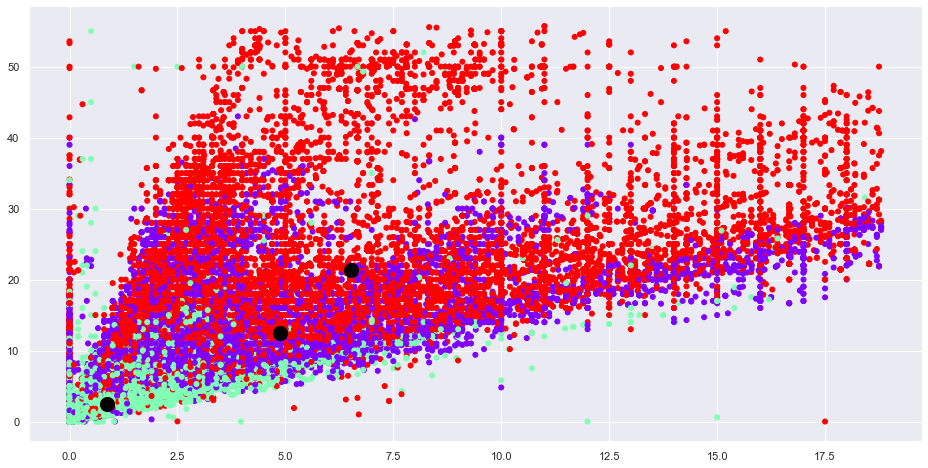

<Figure size 432x288 with 0 Axes>

In [81]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_train_test_separe.jpeg'))

fig= plt.figure(figsize=(16,8)) 
plt.scatter(x[:, 1],x[:, 0], c=labels.astype(float),s=25, cmap='rainbow'); 
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

### KMeans with train and test data separeted 

In [ ]:
sum_of_squared_distances_split = []
si_coef_split = []
#ca_score_split =[]
K = range(1,11)
for k in K:
    k_means_split = KMeans(n_clusters=k)
    model_split = k_means_split.fit(X_train)
    sum_of_squared_distances_split.append(k_means_split.inertia_)
    #y_hat_k_split = k_means_split.predict(X_test)
    labels_k_split = k_means_split.labels_
    if k>1:
        si_coef_split.append(metrics.silhouette_score(X_train, labels_k_split, metric = 'euclidean'))
        #ca_score_split.append(metrics.calinski_harabasz_score(X_train, labels_k_split))

ValueError: x and y must have same first dimension, but have shapes (10,) and (2,)

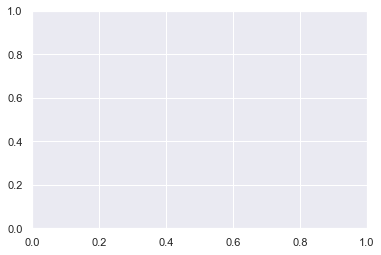

In [83]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_distance_train_test_separe.jpeg'))

plt.plot(K, sum_of_squared_distances_split, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [ ]:
coef_variation = ([ si_coef_split[t]- si_coef_split[t-1] for t in range(1,len(si_coef_split)) ]) 
# We can verify this by calculating the silhouette coefficient and CH score for k=5.
print(coef_variation)


Here we can see the drop in the sum of squared distance starts to slow down after k=1. Hence 2 is the optimal number of clusters for our analysis.

In [ ]:
k=2
k_means = KMeans_split(n_clusters=k).fit(X_train)
labels_split  =k_means_split.labels_
centers_split=k_means_split.cluster_centers_
pred_labels_split   =k_means_split.predict(X_test)

In [ ]:
# faire le kmeans avec tous les donnees

In [ ]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_train_test_separe.jpeg'))

fig= plt.figure(figsize=(16,8)) 
plt.scatter(X_train[:, 1],X_train[:, 0], c=labels_split.astype(float),s=25, cmap='rainbow'); 
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [ ]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_predited_train_test_separe.jpeg'))

fig= plt.figure(figsize=(16,8))
plt.scatter(X_test[:, 1],X_test[:, 0], c=pred_labels_split,s=25, cmap='rainbow'); 
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [ ]:
# fig = plt.figure(figsize=(16,14))
# ax = fig.add_subplot(111,projection='3d')
# ax.scatter(X_test[:,0] , X_test[:,2] , X_test[:,1] , c=pred_labels, s=25,cmap='rainbow', zorder=0)
# ax.plot(centers[:,0], centers[:,2], centers[:,1], '.', markersize=50, color='black')
# plt.show()